In [101]:
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imrotate as imgrot

In [102]:
dim = 64
def rect_generator(center_x, center_y, scale,angle=0, d = 1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
#     data[lb-d:ub+d,lb-d:ub+d]=1
#     data[lb+d:ub-d,lb+d:ub-d]=0
    data[lb_x-d:ub_x+d,lb_y-d:ub_y+d]=1
    data[lb_x:ub_x,lb_y:ub_y]=0
    data = imgrot(data, angle, interp='bicubic')
    return data

def crs_generator(center_x, center_y, scale, angle=0, d=1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x:ub_x,center_y-d:center_y+d]=1
    data[center_x-d:center_x+d,lb_y:ub_y]=1
    data = imgrot(data, angle, interp='bicubic')
    return data

def rectcrs_generator(center_x, center_y, scale,angle=0, d=1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x-d:ub_x+d,lb_y-d:ub_y+d]=1
    data[lb_x:ub_x,lb_y:ub_y]=0
    
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x:ub_x,center_y-d:center_y+d]=1
    data[center_x-d:center_x+d,lb_y:ub_y]=1
    data = imgrot(data, angle, interp='bicubic')
    return data

def sph_generator(center_x, center_y, scale, angle=0, d=1):
    from skimage.draw import circle_perimeter
    img = np.zeros((dim, dim), dtype=np.uint8)
    rr, cc = circle_perimeter(center_x, center_y, scale)
    img[rr, cc] = 1
    rr, cc = circle_perimeter(center_x, center_y, scale-d)
    img[rr, cc] = 1
#     plt.imshow(img)
    img = imgrot(img, angle, interp='bicubic')
    return img

In [103]:
rect_img = []
rect_label = []
rect_z = []
cross_img = []
cross_label = []
cross_z = []
rectcrs_img = []
rectcrs_label = []
rectcrs_z = []
sph_img = []
sph_label = []
sph_z = []

import itertools
dim = 64
center_x = center_y = [dim/2-3,dim/2-2,dim/2-1,dim/2,dim/2+1,dim/2+2,dim/2+3]
centers = list(itertools.product(center_x, center_y))
# centers = [(29,29)]

for rot in range(0,20):
    for center in centers:
        for d in range(1,5):
            center_x, center_y = center
            ########################
            data = rect_generator(center_x, center_y, np.int(dim/3), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]
            
            data = rect_generator(center_x, center_y, np.int(dim/3.5), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]
            
            data = rect_generator(center_x, center_y, np.int(dim/4), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]

            ########################
            data = crs_generator(center_x, center_y, np.int(dim/3), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]
            
            data = crs_generator(center_x, center_y, np.int(dim/3.5), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]
            
            data = crs_generator(center_x, center_y, np.int(dim/4), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]

            ########################
            data = rectcrs_generator(center_x, center_y, np.int(dim/3), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot,d])]
            
            data = rectcrs_generator(center_x, center_y, np.int(dim/3.5), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot,d])]
            
            data = rectcrs_generator(center_x, center_y, np.int(dim/4), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot, d])]

#             ########################
#             data = sph_generator(center_x, center_y,  np.int(dim/3/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/3)])]
            
#             data = sph_generator(center_x, center_y,  np.int(dim/3.5/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/3.5)])]

#             data = sph_generator(center_x, center_y,  np.int(dim/4/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/4)])]

rect_img = np.asarray(rect_img)
rect_label = np.asarray(rect_label)
rect_z = np.asarray(rect_z)
cross_img = np.asarray(cross_img)
cross_label = np.asarray(cross_label)
cross_z = np.asarray(cross_z)
rectcrs_img = np.asarray(rectcrs_img)
rectcrs_label = np.asarray(rectcrs_label)
rectcrs_z = np.asarray(rectcrs_z)
sph_img = np.asarray(sph_img)
sph_label = np.asarray(sph_label)
sph_z = np.asarray(sph_z)
dictionary = {'rect_img':rect_img,'rect_label':rect_label,'rect_z':rect_z,
              'cross_img':cross_img,'cross_label':cross_label, 'cross_z':cross_z,
              'rectcrs_img':rectcrs_img,'rectcrs_label':rectcrs_label, 'rectcrs_z':rectcrs_z,
              'sph_img':sph_img,'sph_label':sph_label, 'sph_z':sph_z}
np.save('rec_crs.npy', dictionary)

In [104]:
rect_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [190]:
# %reset
import numpy as np
from random import sample

nn = np.load('rec_crs.npy')
dim = 64

crs = nn.item()['rectcrs_img']#['cross_img']
crs = crs.reshape(crs.shape[0],1,dim,dim)
crs_label = [[1,1]+[0]*0] * crs.shape[0]
crs_z = nn.item()['rectcrs_z']
crs_z = crs_z.reshape(crs.shape[0],2)

rec = nn.item()['rect_img']
rec = rec.reshape(rec.shape[0],1,dim,dim)
rec_label = [[0,1]+[0]*0] * rec.shape[0]
rec_z = nn.item()['rect_z']
rec_z = rec_z.reshape(crs.shape[0],2)

data = np.append(crs,rec,0)
label = np.append(crs_label,rec_label,0)
label_z = np.append(crs_z,rec_z,0)
label_z = label_z.astype('float32')
label_z[:,0] = (label_z[:,0]-np.min(label_z[:,0])) * 1.0 / (np.max(label_z[:,0])-np.min(label_z[:,0]))
label_z[:,1] = (label_z[:,1]-np.min(label_z[:,1])) * 1.0 / (np.max(label_z[:,1])-np.min(label_z[:,1]))

# ttn = 128*4
# data = [datas[len(datas)/ttn*i] for i in range(ttn) ]
# label = [labels[len(datas)/ttn*i] for i in range(ttn) ]
data = np.asarray(data)
label = np.asarray(label)
label_z = np.asarray(label_z)

split = 0.2
l = len(data) #length of data
n1 = int(split*l)  # split for testing
n2 = l - n1
indices = sample(range(l),n1)

data_test = data[indices]
label_test = label[indices]
label_z_test = label_z[indices]

data_train = np.delete(data,indices,0)
label_train = np.delete(label,indices,0)
label_z_train = np.delete(label_z,indices,0)


In [202]:
# %reset
import h5py

train_features = []
train_targets = []
train_z = []
test_features = []
test_targets = []
train_z = []
test_z = []
for index, array in enumerate(data_train):
    train_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
    train_targets.append(label_train[index])
    train_z.append(label_z_train[index])
for index, array in enumerate(data_test):
    test_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
    test_targets.append(label_test[index])
    test_z.append(label_z_test[index])

train_features = np.array(train_features)
train_targets = np.array(train_targets) #starts from 0
train_z = np.array(train_z)
test_features = np.array(test_features)
test_targets = np.array(test_targets)
test_z = np.array(test_z)
train_n, c, p1, p2 = train_features.shape
test_n = test_features.shape[0]
n = train_n + test_n

f = h5py.File('rectcrs_z.hdf5', mode='w')
features = f.create_dataset('features', (n, c, p1, p2), dtype='float32')
m = 2
targets = f.create_dataset('targets', (n, m), dtype='float32')
z = f.create_dataset('z', (n, m), dtype='float32')

features[...] = np.vstack([train_features, test_features])
targets[...] = np.vstack([train_targets, test_targets]).reshape(n,m)
z[...] = np.vstack([train_z, test_z]).reshape(n,m)

features.dims[0].label = 'batch'
features.dims[1].label = 'channel'
features.dims[2].label = 'height'
features.dims[3].label = 'width'
targets.dims[0].label = 'batch'
targets.dims[1].label = 'targets'
z.dims[0].label = 'batch'
z.dims[1].label = 'targets'


from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'features': (0, train_n), 'targets': (0, train_n), 'z': (0, train_n)},
    'valid': {'features': (train_n, n), 'targets': (train_n, n), 'z': (train_n, n)}}
# split_dict = {
#     'train': {'features': (0, train_n), 'targets': (0, train_n)},
#     'valid': {'features': (train_n, n), 'targets': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)

f.flush()
f.close()

In [203]:
import h5py
from random import sample
import numpy as np
f = h5py.File("rectcrs_z.hdf5", "r")
# f = h5py.File(datadir + "/rect_rectcrs0.hdf5", "r")
data_key = f.keys()[0]
data = np.asarray(f[data_key], dtype='float32')  # normalized into (-1, 1)
# data = (np.asarray(f[data_key],dtype='float32') / 255. - 0.5 )*2 # normalized into (-1, 1)
# data = data.transpose((0,2,3,1))
label_key = f.keys()[1]
label = np.asarray(f[label_key])
z_key = f.keys()[2]
z = np.asarray(f[z_key])

split = 0.1
l = len(data)  # length of data
n1 = int(split * l)  # split for testing
indices = [1,-2,3,-4,5,-6,7,-8,9,-10,11,-12,13,-14,15,-16]#sample(range(l), n1)

x_test = data[indices]
y_test = label[indices]
z_test = z[indices]
x_train = np.delete(data, indices, 0)
y_train = np.delete(label, indices, 0)
z_train = np.delete(z, indices, 0)


/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.


## Material images

In [124]:
% reset
from scipy.io import loadmat #be used to get data from .mat document 
tmpdata = loadmat('/home/hope-yao/Documents/Data/Ti_hope.mat')
x = tmpdata['xtr_store']
data = x.reshape(200,200,1,1000).transpose(3,0,1,2)
data = data[:,4:196,4:196,:]

# tmpdata = loadmat('/home/hope-yao/Documents/Data/WB_sm.mat')
# x = tmpdata['WB_sm']
# data = x.reshape(100,100,1,1000).transpose(3,0,1,2)

import numpy as np
from random import sample
split = 0.2
l = len(data) #length of data
n1 = int(split*l)  # split for testing
n2 = l - n1
indices = sample(range(l),n1)

data_test = data[indices]
data_train = np.delete(data,indices,0)

# %reset
import h5py
train_features = []
test_features = []
for index, array in enumerate(data_train):
    train_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
for index, array in enumerate(data_test):
    test_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))

train_features = np.array(train_features)
test_features = np.array(test_features)
train_n, c, p1, p2 = train_features.shape
test_n = test_features.shape[0]
n = train_n + test_n

f = h5py.File('Ti_hope.hdf5', mode='w')
features = f.create_dataset('features', (n, c, p1, p2), dtype='float32')
features[...] = np.vstack([train_features, test_features])

features.dims[0].label = 'batch'
features.dims[1].label = 'channel'
features.dims[2].label = 'height'
features.dims[3].label = 'width'

from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'features': (0, train_n)},
    'valid': {'features': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)
f.flush()
f.close()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


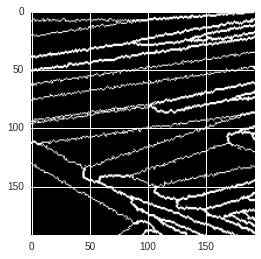

(1000, 192, 192, 1)

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data[0,:,:,0])
plt.show()
data.shape

In [118]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import regularizers

input_img = Input(shape=(194, 194, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l2(1e-5))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
# x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
# x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')



from keras.datasets import mnist
import numpy as np
import scipy.io as sio

WB=sio.loadmat('/home/hope-yao/Documents/Data/Ti_hope.mat')['xtr_store']
x_train = WB.transpose((1,0))
x_test = WB.transpose((1,0))
x_train = x_train.astype('float32') / 1.
x_test = x_test.astype('float32') / 1.

x_train = np.reshape(x_train, (1000, 200, 200, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (1000, 200, 200, 1))  # adapt this if using `channels_first` image data format


autoencoder.fit(x_train, x_train,
                epochs=2000,
                batch_size=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/2000


ResourceExhaustedError: OOM when allocating tensor with shape[5,200,200,64]
	 [[Node: conv2d_70/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_input_6_0/_47, conv2d_70/kernel/read)]]
	 [[Node: add_123/_75 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1712_add_123", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'conv2d_70/convolution', defined at:
  File "/home/hope-yao/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/hope-yao/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-5ed23c273953>", line 8, in <module>
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 554, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/keras/layers/convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 2862, in conv2d
    data_format='NHWC')
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 639, in convolution
    op=op)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 308, in with_space_to_batch
    return op(input, num_spatial_dims, padding)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 631, in op
    name=name)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 129, in _non_atrous_convolution
    name=name)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 396, in conv2d
    data_format=data_format, name=name)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/hope-yao/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[5,200,200,64]
	 [[Node: conv2d_70/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_input_6_0/_47, conv2d_70/kernel/read)]]
	 [[Node: add_123/_75 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1712_add_123", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
